In [1]:
# import the mbd package
import pymbd as pymbd  # python functions
import pymbd.lib as mbd  # fortran functions

print(pymbd)
print(mbd)

<module 'pymbd' from '/usr/local/lib/python3.6/site-packages/pymbd/__init__.py'>
<fortran object>


In [2]:
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bohr = mbd.bohr
print(bohr)

0.529177249


In [4]:
# initialize the frequency grid to 20 points
mbd.init_grid(20)

## Argon dimer

In [5]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (4., 0., 0.)]/bohr

In [6]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [7]:
mbd.get_single_mbd_energy(
    '', 'fermi,dip',
    xyz, alpha_0, omega,
    r_vdw=R_vdw, beta=1., a=6.
)[0]

-0.00012237370437961914

In [8]:
mbd.get_single_rpa_energy(
    '', 'fermi,dip',
    xyz, mbd.alpha_dynamic_ts_all('C', mbd.n_grid_omega, alpha_0, c6=C6),
    r_vdw=R_vdw, beta=1., a=6.
)[0]

-0.00012237370439252508

In [9]:
mbd.get_ts_energy(
    '', 'fermi2',
    xyz, C6, alpha_0,
    r_vdw=R_vdw, s_r=1., d=6.
)

-0.00012234680219387335

## Linear argon chain

In [10]:
species = ['Ar']
xyz = [(0., 0., 0.)]/bohr
uc = np.array([(4., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)
mbd.param_k_grid_shift = 0

In [11]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [12]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [13]:
omegas = mbd.get_reciprocal_mbd_energy(
    'REV', 'dip,gg',
    xyz, alpha_0, omega, k_grid, uc,
    r_vdw=R_vdw, beta=1., a=6.
)[1]

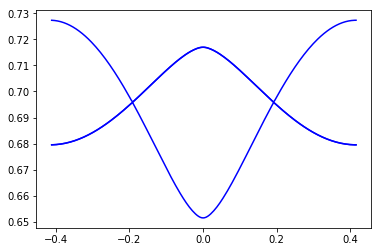

In [14]:
plt.plot(*chain.from_iterable(
    (*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-')
    for i in range(omegas.shape[1])
))

In [15]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy(
        'R', 'fermi,dip',
        xyz, alpha_0, omega, k_grid, uc,
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_periodic.append(ene)

In [16]:
ns_cell = [4, 8, 12, 20, 40, 80]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy(
        'C', 'fermi,dip',
        xyz, alpha_0, omega, uc, (n_cell, 1, 1),
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_supercell.append(ene)

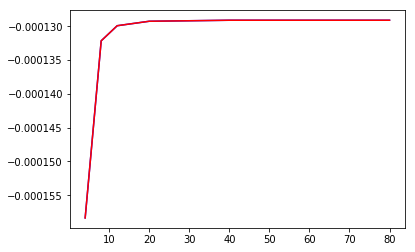

In [17]:
plt.plot(
    ns_cell, enes_supercell, 'b',
    ns_kpt, enes_periodic, 'r'
)

In [18]:
mbd.get_ts_energy('C', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.00012831268688250254

In [19]:
(enes_supercell[-1], enes_periodic[-1])

(-0.00012910197577742366, -0.00012910197602867545)

## Linear argon chain (2 atoms in cell)

In [20]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (4., 0., 0.)]/bohr
uc = np.array([(8., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [21]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [22]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [23]:
omegas = mbd.get_reciprocal_mbd_energy(
    'REV', 'fermi,dip',
    xyz, alpha_0, omega, k_grid, uc,
    r_vdw=R_vdw, beta=1., a=6.
)[1]

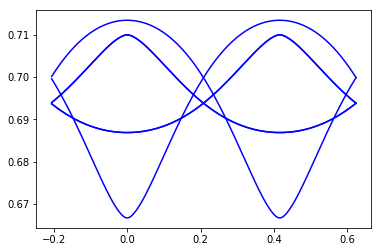

In [24]:
plt.plot(*chain.from_iterable((
    *zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))),
    'b-',
    *zip(*sorted(zip(k_grid[:, 0]+2*np.pi/8*bohr, omegas[:, i]))),
    'b-'
) for i in range(omegas.shape[1])))

In [25]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy(
        'R', 'fermi,dip',
        xyz, alpha_0, omega, k_grid, uc,
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_periodic.append(ene)

In [26]:
ns_cell = [4, 8, 12, 20, 40, 80]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy(
        'C', 'fermi,dip',
        xyz, alpha_0, omega, uc, (n_cell, 1, 1),
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_supercell.append(ene)

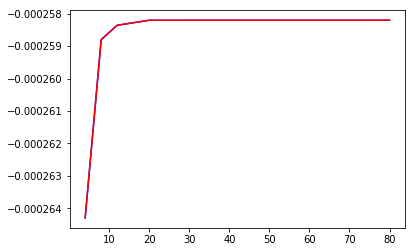

In [27]:
plt.plot(
    ns_cell, enes_supercell, 'b',
    ns_kpt, enes_periodic, 'r'
)

In [28]:
mbd.get_ts_energy('C', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)/2

-0.00012831268688250254

In [29]:
(enes_supercell[-1]/2, enes_periodic[-1]/2)

(-0.00012910197563549276, -0.0001291019760286727)

## Two parallel argon chains

In [30]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (0., 0., 4.)]/bohr
uc = np.array([(4., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [31]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [32]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [33]:
omegas = mbd.get_reciprocal_mbd_energy(
    'REV', 'fermi,dip',
    xyz, alpha_0, omega, k_grid, uc,
    r_vdw=R_vdw, beta=1., a=6.
)[1]

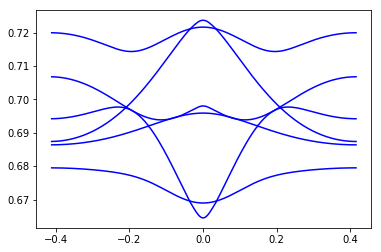

In [34]:
plt.plot(*chain.from_iterable(
    (*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-')
    for i in range(omegas.shape[1])
))

In [35]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy(
        'R', 'fermi,dip',
        xyz, alpha_0, omega, k_grid, uc,
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_periodic.append(ene)

In [36]:
ns_cell = [4, 8, 12, 20, 40, 80]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy(
        'C', 'fermi,dip',
        xyz, alpha_0, omega, uc, (n_cell, 1, 1),
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_supercell.append(ene)

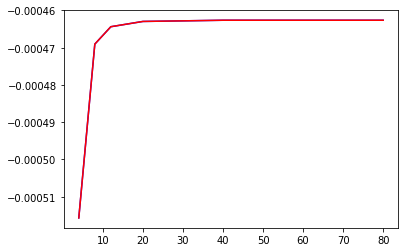

In [37]:
plt.plot(ns_cell, enes_supercell, 'b', ns_kpt, enes_periodic, 'r')

In [38]:
mbd.get_ts_energy('C', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.0004638224663728552

In [39]:
(enes_supercell[-1], enes_periodic[-1])

(-0.000462687669745776, -0.00046268767025250956)

## Argon crystal

In [40]:
species = ['Ar']
xyz = [(0., 0., 0.)]/bohr
uc = np.array([(4., 0., 0.), (0., 4., 0.), (0., 0., 4.)])/bohr
mbd.param_vacuum_axis = (False, False, False)

In [41]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [42]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [43]:
omegas = mbd.get_reciprocal_mbd_energy(
    'REV', 'fermi,dip',
    xyz, alpha_0, omega, k_grid, uc,
    r_vdw=R_vdw, beta=1., a=6.
)[1]

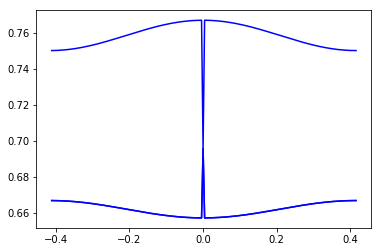

In [44]:
plt.plot(*chain.from_iterable(
    (*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-')
    for i in range(omegas.shape[1])
))

In [45]:
mbd.param_k_grid_shift = 0.5
ns_kpt = [3, 4, 5, 6, 7, 8]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, n_kpt, n_kpt), uc)
    ene = mbd.get_reciprocal_mbd_energy(
        'R', 'fermi,dip',
        xyz, alpha_0, omega, k_grid, uc,
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_periodic.append(ene)

In [46]:
ns_cell = [3, 4, 5, 6, 7]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy(
        'C', 'fermi,dip',
        xyz, alpha_0, omega, uc, (n_cell, n_cell, n_cell),
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_supercell.append(ene)

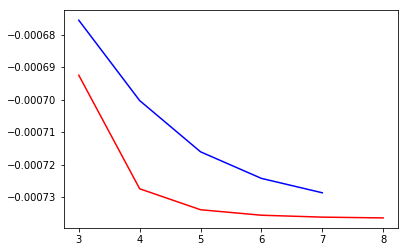

In [47]:
plt.plot(ns_cell, enes_supercell, 'b', ns_kpt, enes_periodic, 'r')

In [48]:
mbd.get_ts_energy('C', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.0007567630819410793

## Graphene

In [49]:
species = ['C', 'C']
xyz = [(0., 0., 0.), (2.46000413, 1.42034734, 0.)]/bohr
uc = np.array([
    (2.45999892, 0.00000000, 0.00000000),
    (1.22999946, 2.13042155, 0.00000000),
    (0.00000000, 0.00000000, 100.00000000)
])/bohr
mbd.param_vacuum_axis = (False, False, True)
mbd.param_k_grid_shift = 0.

In [50]:
alpha_0, C6, R_vdw = pymbd.get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [51]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [52]:
omegas = mbd.get_reciprocal_mbd_energy(
    'REV', 'fermi,dip',
    xyz, alpha_0, omega, k_grid, uc,
    r_vdw=R_vdw, beta=1., a=6.
)[1]

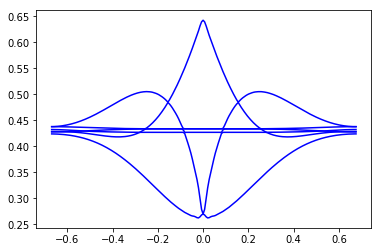

In [53]:
plt.plot(*chain.from_iterable(
    (*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-')
    for i in range(omegas.shape[1])
))

In [54]:
ns_kpt = [4, 6, 8, 10, 15, 20, 30]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, n_kpt, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy(
        'R', 'fermi,dip',
        xyz, alpha_0, omega, k_grid, uc,
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_periodic.append(ene)

In [55]:
ns_cell = [5, 7, 9, 11, 13, 17]
enes_supercell = []
for n_cell in ns_cell:
    ene = mbd.get_supercell_mbd_energy(
        'C', 'fermi,dip',
        xyz, alpha_0, omega, uc, (n_cell, n_cell, 1),
        r_vdw=R_vdw, beta=1., a=6.
    )[0]
    enes_supercell.append(ene)

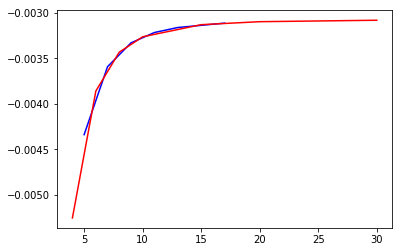

In [56]:
plt.plot(ns_cell, enes_supercell, 'b', ns_kpt, enes_periodic, 'r')